### download data from USGS
https://www.earthdatascience.org/tutorials/acquire-and-visualize-usgs-hydrology-data/

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import climata
from climata.usgs import DailyValueIO
from climata.usgs import SiteIO
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import numpy as np
import time
from pprint import pprint

register_matplotlib_converters()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### read gage ID from csv file

In [2]:
import csv
stations = pd.read_csv("./NWM_Gage_Adjustments_attribute_table_20200510.csv")
# print(df.STNID)

test1 = stations.STNID[10:11]
str_output = '{:0>8}'.format(int(test1))
print(str_output)
# station_id = str_output
site_params = SiteIO(basin='02070010')
# for site_param in site_params:
#     print(site_param.site_no, site_param.parm_cd, site_param.end_date)

01019000


#### extracting data for a specific USGS ID

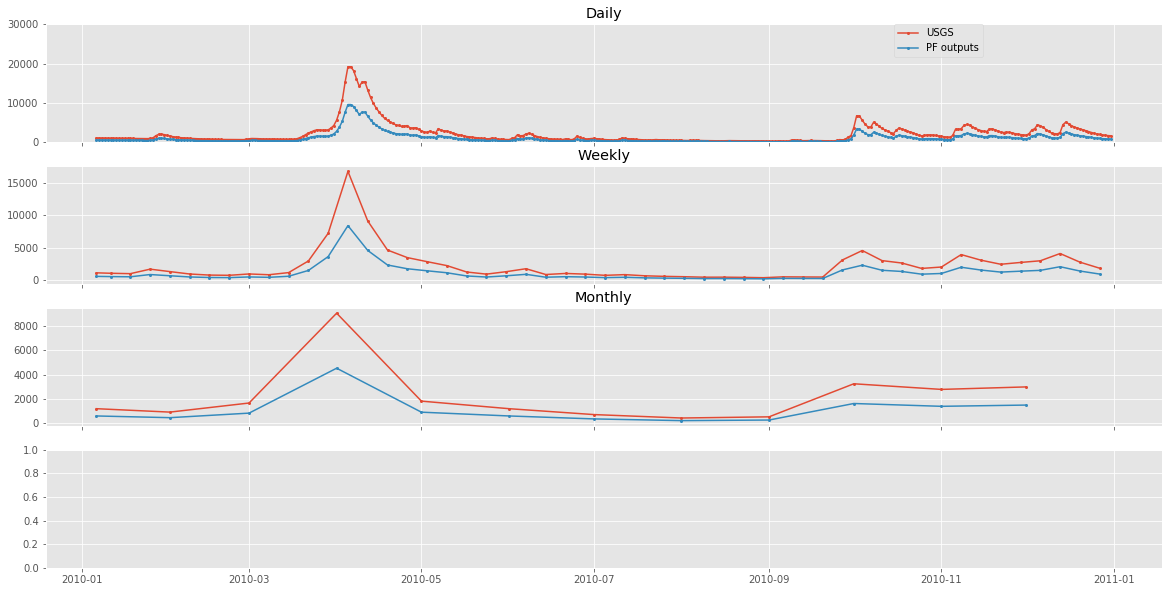

In [3]:
# set parameter
test1 = stations.STNID[0:1]
nyears = 1
ndays = 360*nyears
# ndays = 10
end_date = "2010-12-31"
# nST = len(test1)
# flow_all = np.zeros( (ndays, nST) )
# print(test1)
t0 = time.time()
j = 1
for i in test1:
    str_output = '{:0>8}'.format(int(i))
    station_id = str_output
    param_id = "00060"

    datelist = pd.date_range(end=end_date, periods=ndays).tolist()
    data = DailyValueIO(
        start_date = datelist[0],
        end_date = datelist[-1],
        station = station_id,
        parameter = param_id,
    )
    
#     print(data)
#     pprint(vars(data))
    
#     for series in data:
#         flow = [r[1] for r in series.data]
#         dates = [r[0] for r in series.data]
        
    date = []
    flow = []

    for series in data:
        for row in series.data:
            date.append(row[0])
            flow.append(row[1])
        
    # bundle the data into a data frame
    df = pd.DataFrame({'date': date,
                       'flow': flow})
    
#     print(df.date)

    
    df['date'] = pd.to_datetime( df['date'])  
    df['week'] = df['date'].dt.week
    df['month'] = df['date'].dt.month
    
#     flow_month = df.groupby('month').mean()
#     flow_week = df.groupby('week').mean()
    
    flow_week = df.groupby(['week']).agg({'date':'first', 'flow':'mean'})
    flow_month = df.groupby(['month']).agg({'date':'first', 'flow':'mean'})
    
#     print(flow_week)
    fig, ax = plt.subplots(4, 1, sharex='col', sharey='row', figsize=(20,10))
#     fig, ax = plt.subplot(3, 1)
    ax[0].plot(df.date, df.flow, marker='o', linestyle='-', ms=2, label='USGS')
    ax[0].plot(df.date, df.flow*0.5, marker='o', linestyle='-', ms=2, label='PF outputs')
    ax[0].legend(bbox_to_anchor=(0.8, 1), loc='upper center', borderaxespad=0.)
    ax[0].title.set_text('Daily')
    ax[0].set_ylim([0, 30000])
#     ax[0].set_xlim([0, 300])
#     ax[0].title('Daily')
    
    ax[1].plot(flow_week.date,flow_week.flow, marker='o', linestyle='-', ms=2)
    ax[1].plot(flow_week.date,flow_week.flow*0.5, marker='o', linestyle='-', ms=2)
    ax[1].set_title('Weekly')
    
    ax[2].plot(flow_month.date,flow_month.flow, marker='o', linestyle='-', ms=2)
    ax[2].plot(flow_month.date,flow_month.flow*0.5, marker='o', linestyle='-', ms=2)
    ax[2].title.set_text('Monthly')
#     ax[0].set_xlim([flow_month.date[0], flow_month.date[-1]])

# ax = df['flow'].groupby(df.dt64.dt.year).sum().plot(x='date', y='flow', kind='line', figsize=(20,10))
    
    
    plt.show()
    
#     plt.plot(df.date, df.flow)
#     plt.xlabel('Date')
#     plt.ylabel('Streamflow')
#     plt.title(series.site_name)
#     plt.xticks(rotation='vertical')
#     plt.show()



t1 = time.time()
# print("total time:",t1-t0)
    # print(flow)   

# type(data)
# data[0]

In [4]:
a = data.data
# print(dir(data))
# print(dir(a))
# print(getattr(a))

# pprint(vars(data))
# print(type(a))
b=a[0]
print(b)
# pprint(vars(a))

{'site_name': 'Allagash River near Allagash, Maine', 'site_code': '01011000', 'variable_name': 'Streamflow, ft&#179;/s', 'variable_code': '00060', 'unit': 'ft3/s', 'latitude': 47.0697222, 'longitude': -69.0794444, 'data': <climata.parsers.TimeSeriesIO object at 0x7f6f7514f9a0>}


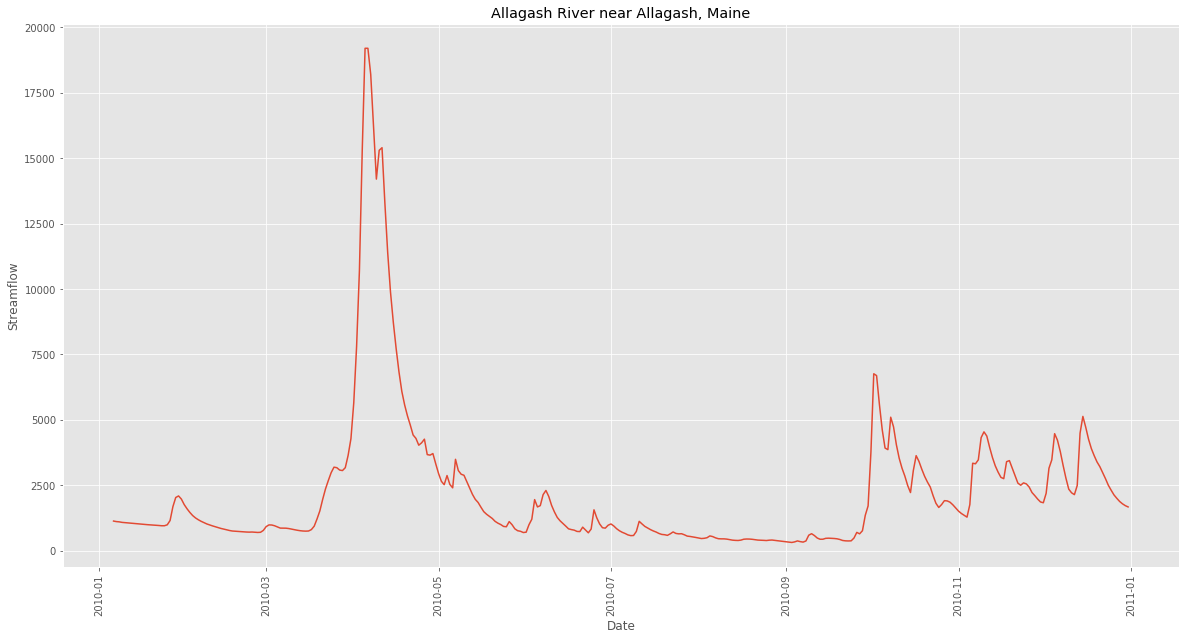

In [5]:
# create lists of date-flow values
for series in data:
    flow = [r[1] for r in series.data]
    dates = [r[0] for r in series.data]

# print(flow)   
plt.plot(dates, flow)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.title(series.site_name)
plt.xticks(rotation='vertical')
plt.show()

#### extracting data for a county using a FIPS code 

In [6]:
# set parameters
nyears = 1
ndays = 365 * nyears
county = "08013"
datelist = pd.date_range(end=pd.datetime.today(), periods = ndays).tolist()

data = DailyValueIO(
    start_date = datelist[0],
    end_date = datelist[-1],
    county = county,
)

date = []
value = []

for series in data:
    for row in series.data:
        date.append(row[0])
        value.append(row[1])
        
print(value[10])

<ipython-input-6-cecf539944c6>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  datelist = pd.date_range(end=pd.datetime.today(), periods = ndays).tolist()


31.4


                                                  site       date  value
723   BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO 2019-06-03   49.1
724   BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO 2019-06-04   65.5
725   BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO 2019-06-05  110.0
726   BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO 2019-06-06  159.0
727   BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO 2019-06-07  185.0
...                                                ...        ...    ...
1082  BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO 2020-05-27  106.0
1083  BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO 2020-05-28  100.0
1084  BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO 2020-05-29   96.0
1085  BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO 2020-05-30  110.0
1086  BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO 2020-05-31  193.0

[364 rows x 3 columns]
                                        site       date  value
545  FOURMILE CANYON CREEK NEAR SUNSH

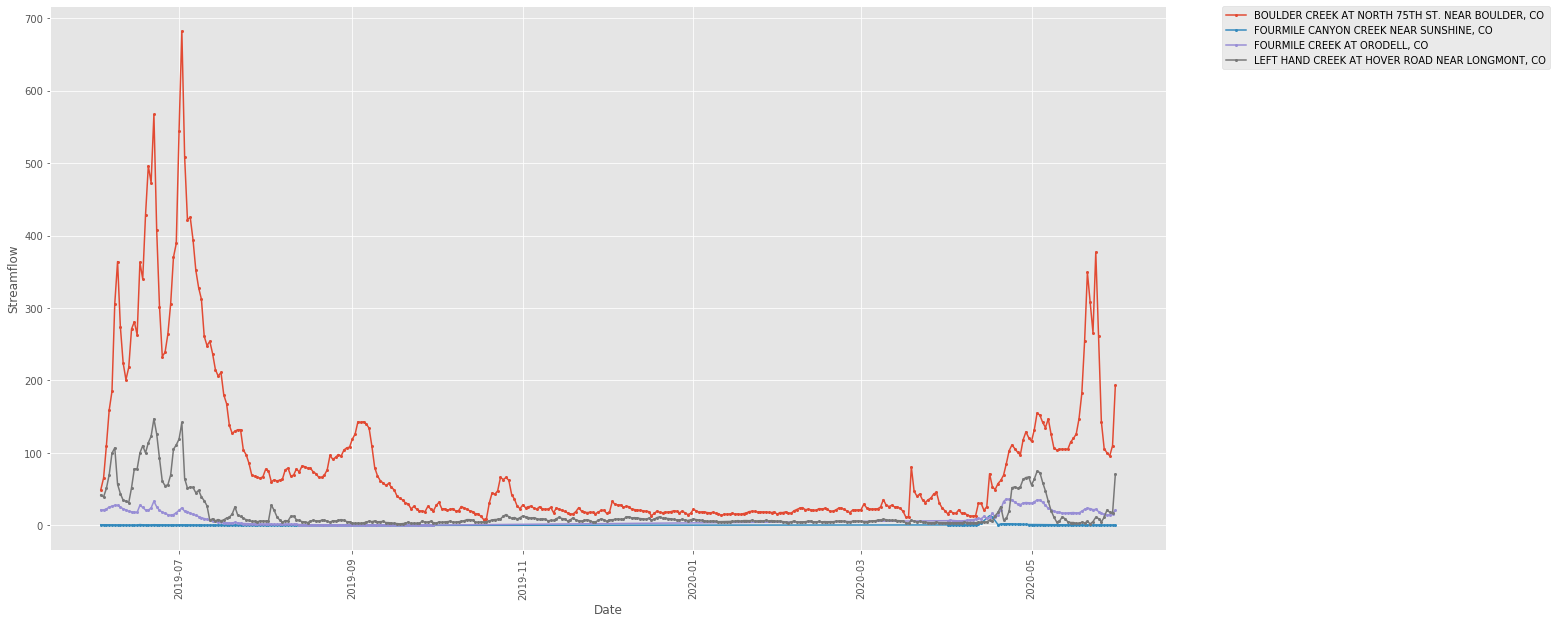

In [7]:
site_names = [[series.site_name] * len(series.data) for series in data]

# print(len(site_names))

#unroll the list of lists
flat_site_names = [item for sublist in site_names for item in sublist]
# print(len(flat_site_names))

# bundle the data into a data frame
df = pd.DataFrame({'site': flat_site_names,
                   'date': date,
                   'value': value})

# remove missing value
df = df[df['value'] != -999999.0]

# visualize flow time series, coloring by site
groups = df.groupby('site')
# print(groups)
fig, ax = plt.subplots()
for name, group in groups:
    print(group)
    ax.plot(group.date, group.value, marker='o', linestyle='-', ms=2, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.xticks(rotation='vertical')
plt.show()